# INF8111 - Fouille de données / Data Mining
## Été 2024 - TP2 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Nicolas Depelteau - 2083544


## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Ce notebook être remis avant le **02 juin 2024 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 6 points

Partie 3: 4 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 2nd 2024 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 6 points

Part 3: 4 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de nos vies. Tout au long de sa,vie, chaque personne appartient à différentes communautés. Avec la récupération de ces informations par les différents réseaux sociaux, les data-analystes ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec de nombreux impacts, notamment sur la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse de réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.

---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour regrouper les personnes dans des communautés selon leurs liens. 

## LPAm+
Dans cette partie, vous devez implémenter l'algorithme LPAm+ pour détecter les communautés parmi les personnages de l'univers cinématographique Marvel (MCU, en anglais). Vous devez utiliser les CSVs *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut fusionner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'il peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser la librairie networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of the Marvel Cinematic Universe (MCU). You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

**Tested on Google Colab Runtime**

In [1]:
%pip install dash==2.14.1 dash-cytoscape==0.3.0
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install networkx
%pip install tqdm
%pip install scikit-learn
%pip install nltk
%pip install seaborn
%pip install imbalanced-learn
%pip install interpret
%pip install interpret-community
!rm -rf data
!mkdir data
!wget https://raw.githubusercontent.com/Depdx/INF8111---Fouille-de-donnees/main/tp2/data/tp-marvel-dataset-subset.csv -P data
!wget https://raw.githubusercontent.com/Depdx/INF8111---Fouille-de-donnees/main/tp2/data/tp-marvel-dataset.csv -P data
!wget https://raw.githubusercontent.com/Depdx/INF8111---Fouille-de-donnees/main/tp2/data/tp-marvel-villains.csv -P data

import nltk
nltk.download("punkt")

from IPython import display
display.clear_output()

In [2]:
# vérifier si les libraries sont bien installés

import networkx
print('networkx: {}'.format(networkx.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

networkx: 3.3
matplotlib: 3.7.1


In [3]:
from itertools import combinations
import numpy as np
import networkx as nx
import random

random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Constructor
    """
    

    def __init__(self, graph: nx.Graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph

        """
        labels gives all the communities present in the network
        """
        self.labels = {node: [node] for node in self.graph.nodes()}

        """
        Assign a label to each node
        """
        for node in self.graph.nodes():
            self.graph.nodes[node]['label'] = node
            
        self.P = np.zeros((len(self.graph.nodes()), len(self.graph.nodes())))
        for i in self.graph.nodes():
            for j in self.graph.nodes():
                self.P[i, j] = (self.graph.degree(i)*self.graph.degree(j))/(2* self.graph.number_of_edges())
                
        self.B = np.zeros((len(self.graph.nodes()), len(self.graph.nodes())))
        for i in self.graph.nodes():
            for j in self.graph.nodes():
                self.B[i, j] = self.graph.has_edge(i, j) - self.P[i, j]

    def label_evaluation(self, current_node, new_label):
        """
        Term to optimize when replacing labels
        """
        eveluated_value = 0
        x = current_node
        for i in self.labels[new_label]:
            eveluated_value += self.B[i, x]
        return eveluated_value

    def update_label(self, current_node):
        """
        Function to choose the new label for a node
        """
        best_labels = []
        best_label_value = -1
        for label in self.labels.keys():
            label_evaluated = self.label_evaluation(current_node, label)
            if label_evaluated > best_label_value:
                best_label_value = label_evaluated
                best_labels = [label]
            elif label_evaluated == best_label_value:
                best_labels.append(label)
        best_label = random.choice(best_labels)

        old_label = self.graph.nodes[current_node]['label']
        if old_label != best_label:
            self.graph.nodes[current_node]['label'] = best_label
            self.labels[best_label].append(current_node)
            if len(self.labels[old_label]) == 1:
                del self.labels[old_label]
            else:
                self.labels[old_label].remove(current_node)

        return old_label not in best_labels


    def modularity(self):
        """
        Function that calculates the current modularity of the network
        """
        modularity = 0
        for i in self.graph.nodes():
            for j in self.graph.nodes():
                if self.graph.nodes[i]['label'] == self.graph.nodes[j]['label']:
                    modularity += self.B[i, j]
        return modularity / (2 * self.graph.number_of_edges())

    def LPAm(self):
        """
        Function that applies the LPAm algorithm on the network
        """
        reach_optimum = False
        modularity = self.modularity()
        while not reach_optimum:
            reach_optimum = True
            for node in self.graph.nodes():
                self.update_label(node)
            new_modularity = self.modularity()
            if new_modularity > modularity:
                reach_optimum = False
                modularity = new_modularity
            



    def merge_communities(self):
        """
        Function that find which communities to combine and combine them
        """
        best_modularity = self.modularity()
        best_smallest_community = None
        best_largest_community = None
        for community1, community2 in combinations(self.labels.keys(), 2):
            smallest_community = community1 if len(self.labels[community1]) < len(self.labels[community2]) else community2
            largest_community = community1 if smallest_community == community2 else community2
            for node in self.labels[smallest_community]:
                self.graph.nodes[node]['label'] = largest_community
            new_modularity = self.modularity()
            if new_modularity > best_modularity:
                best_modularity = new_modularity
                best_largest_community = largest_community
                best_smallest_community = smallest_community
            for node in self.labels[smallest_community]:
                self.graph.nodes[node]['label'] = smallest_community
        if best_largest_community is not None:
            for node in self.labels[best_smallest_community]:
                self.graph.nodes[node]['label'] = best_largest_community
            self.labels[best_largest_community].extend(self.labels[best_smallest_community])
            del self.labels[best_smallest_community]
            return True
        return False

    def find_communities(self):
        """
        Function that applies the LPAm+ algorithm on the network
        """
        reach_optimum = False
        while not reach_optimum:
            reach_optimum = True
            self.LPAm()
            if self.merge_communities():
                reach_optimum = False


### 1.1 Dataset (1 point)

Nous vous avons fourni le fichier *`tp-marvel-dataset-subset.csv`* contenant l'ensemble des personnages de l'univers cinématographique Marvel. Vous devez maintenant créer un graphe reliant tous les personnages. Vous devez suivre les règles ci-dessous :

#### Mise en œuvre
1. Implémentez la fonction *`load_unweighted_network`*. Cette fonction retourne un graphe non orienté et non pondéré.
2. Chaque personnage est un nœud unique du graphe. Aucun personnage ne peut donc apparaître deux fois dans le graphe.
3. Tous les personnages d'un même film doivent être connectés.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un sous-ensemble de l'ensemble de données. Vous devriez obtenir un résultat semblable à celui-ci :

![titre](picture.png)

---
We have provided you with the a .CSV file, called *`tp-marvel-dataset-subset.csv`*, with all the characters from movies in the Marvel Cinematic Universe. You must now create a graph connecting all the characters. You should follow the rules below:

#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.
2. Each character must be a single node inside the graph. No character should appear twice in the graph. 
3. All characters in a same movie should be connected.

Use the function `test_load` to verify your implementation of the function. This test uses a subset of the whole dataset. You should obtain a result similar to this:

![title](picture.png)


In [4]:
import pandas as pd
import networkx as nx
from itertools import combinations

def load_unweighted_network(source_csv):
    df = pd.read_csv(source_csv, delimiter=";")[[ 'Hero_id', 'Movie']]
    df["Movie"] = pd.Categorical(df["Movie"]).codes
    df = df.groupby('Movie')['Hero_id'].apply(lambda x: list(combinations(x, 2))).reset_index(name='pairs')["pairs"]
    df = df.explode().reset_index(drop=True).dropna().values
    network = nx.from_edgelist(df)
    return network


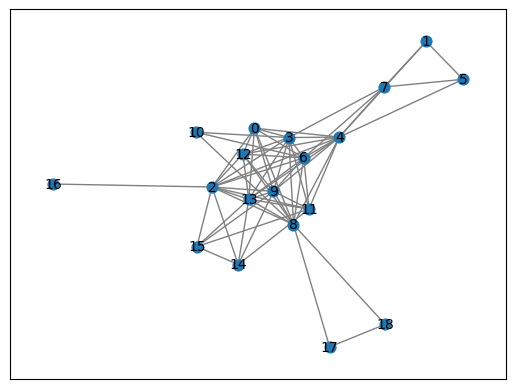

<Figure size 2000x2000 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

def test_load():
    network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    nx.draw_networkx(network, node_size=60, font_size=10, edge_color = 'gray', font_color='black')
    plt.figure(figsize=(20,20))
    plt.show()

test_load()

### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: nombre d'arêtes
- l: étiquette d'un sommet
- u, v: sommets du réseau
- B: matrice de modularité (chaque élément vaut $A_{uv} - P_{uv}$)
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: symbole de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les `nodes` agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.019.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.019.

In [6]:
def test_modularity():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 16):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.019


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (2 points)

Comme mentionné plus haut, l'algorithme est basé sur une optimisation de la modularité. Il vous est demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme a la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction met à jour la nouvelle étiquette pour un sommet. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et modifie leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimum de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe avec la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.184 avec 5 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.184 with 5 communities.

In [7]:
def test_lpam():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.185
Communities: {14: [14, 11, 15, 2, 16, 13, 9], 10: [3], 18: [18, 17, 8, 10, 6, 0, 12], 1: [1, 4, 7, 5]}


### 1.5 LPAm+ (2 points)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va réessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne puisse plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction évalue si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.204 et 3 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.204 and 3 communities.

In [8]:
def test_lpam_plus():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.204
Communities: {15: [15, 11, 14, 2, 16, 13, 9], 18: [18, 17, 8, 10, 6, 0, 12, 3], 5: [5, 4, 7, 1]}


### 1.6 MCU dataset (2 points)

Exécutez votre algorithme sur l'ensemble de données de caractères MCU complet (*`tp-marvel-dataset.csv`*) et comparez ce que vous obtenez avec les communautés réelles. Ces communautés réelles se trouvent dans la colonne Affiliation du csv.

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n : nombre de nœuds
- TP : Vrai positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats et dans la vérité terrain
- TN : Vrai négatif le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans la vérité terrain
- FP : Faux positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans la vérité terrain
- FN : Faux négatif le nombre de paires d'éléments qui sont dans des communautés différentes dans vos résultats mais qui sont dans la même communauté dans la vérité terrain

**N.B :** Ce qui compte ici, c'est la composition des communautés que vous avez trouvées, pas les noms. Un TP, c'est quand le nœud a et le nœud b sont tous les deux dans les mêmes communautés dans votre résultat et dans la vérité terrain.

Répondre aux questions suivantes. Ce sont des guides pour votre analyse.

- L'algorithme fonctionne-t-il bien ?
- Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?
- Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?

Vous pouvez faire les manipulations que vous souhaitez pour mieux présenter vos résultats et mieux étayer vos propos.

---

Run your algorithm over whole MCU characters dataset (*`tp-marvel-dataset.csv`*) and compare what you get and the real communities. The ground truth is found in the Affiliation column in the csv. 

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well?
- Does the lack of many communities affect the algorithmic performance?
- How does the fact of connecting all characters in a movie affect the results?
- Explain why you obtained those results by analysing the communities in the dataset. Which particularities offer better results, or hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [36]:
network = load_unweighted_network("data/tp-marvel-dataset.csv")
lpam = LPAmPlus(network)
lpam.find_communities()
lpam.labels.keys()

dict_keys([86, 309, 342, 156, 301, 246, 83])

In [37]:
from itertools import combinations

gt_df = pd.read_csv("data/tp-marvel-dataset.csv", delimiter=";")
nodes_to_communities = {node: lpam.graph.nodes[node]['label'] for node in lpam.graph.nodes()}
df = pd.DataFrame(list(combinations(lpam.graph.nodes(), 2)), columns=['Hero_id_1', 'Hero_id_2'])
df["Hero_id_1_community"] = df["Hero_id_1"].map(nodes_to_communities)
df["Hero_id_2_community"] = df["Hero_id_2"].map(nodes_to_communities)
hero_to_affiliation = gt_df.set_index('Hero_id')['Affiliation'].to_dict()
df["Hero_id_1_affiliation"] = df["Hero_id_1"].map(hero_to_affiliation)
df["Hero_id_2_affiliation"] = df["Hero_id_2"].map(hero_to_affiliation)
df["Result"] = df["Hero_id_1_community"] == df["Hero_id_2_community"]
df["Ground_truth"] = df["Hero_id_1_affiliation"] == df["Hero_id_2_affiliation"]

TP = df[(df["Result"] == True) & (df["Ground_truth"] == True)].shape[0]
TN = df[(df["Result"] == False) & (df["Ground_truth"] == False)].shape[0]
FP = df[(df["Result"] == True) & (df["Ground_truth"] == False)].shape[0]
FN = df[(df["Result"] == False) & (df["Ground_truth"] == True)].shape[0]
RI = (TP + TN) / (TP + TN + FP + FN)
print("Rand Index: {:.2f} %".format(RI*100))

Rand Index: 34.12 %


#### Analyse / Analysis


1. L'algorithme fonctionne-t-il bien ?

    L'algorithm a un RI de 34 %. Cela signifie qu'il performe mal.

1. Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?

    Si l'algorithme ne parvient pas à détecter des communautés plus petites ou plus spécifiques, cela peut entraîner une baisse du RI car il manque des associations importantes entre les personnages.

1. Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?

    Si un film met en vedette un groupe de personnages qui interagissent fréquemment ensemble, cela peut renforcer les liens au sein de cette communauté, ce qui peut être capturé par l'algorithme. Cependant, cela peut également introduire du bruit si certains personnages n'ont que des interactions marginales.

1. Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?

    Ceux non afflilié est une communauté rammasse tout. Elle contient donc beaucoup de film alors qu'ils n'ont pas nécessairemnt un lien entre eux. À cause de cela, il est possible que l'algorithm trouve des sous-commuauté aux sein de cette énorme communauté. En comparant avec les affiliations ont trouvera donc nécessairement un moins bon RI.

# 2. Social network analysis (6 points)

Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau, c'est-à-dire les personnes autour desquelles les personnes du réseau se regroupent.

Il y a des mesures qui permettent de connaître ces personnes : les mesures de centralité. **Vous devez implémenter ces métriques vous-mêmes. N'utilisez pas l'implémentation `networkx` pour le tp.** Utilisez le dataset Marvel complet. 

---

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** Use the whole Marvel dataset. 



## 2.1 Centralité de degré / Degree centrality (2 points)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule selon la formule suivante $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

2. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.48.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.
2. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.48.

In [12]:
import pandas as pd

def calculate_degree_centrality(social_network):
    for node in social_network.nodes():
        social_network.nodes[node]['centrality_degree'] = social_network.degree(node) / (social_network.number_of_nodes() - 1)
    return [social_network.nodes[node]['centrality_degree'] for node in social_network.nodes()]

top_10_centrality = sorted(calculate_degree_centrality(network), reverse=True)[:10]
df = pd.DataFrame(top_10_centrality, columns=['Degree Centrality'])
df

,Degree Centrality
0,0.484058
1,0.426087
2,0.417391
3,0.411594
4,0.373913
5,0.371014
6,0.368116
7,0.359420
8,0.359420
9,0.353623


## 2.2 Centralité de proximité / Closeness centrality (2 points)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule avec la formule suivante $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour le plus grand composant connexe. À titre indicatif, la centralité la plus élevée devrait être de 0.67.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the largest connected component. As a hint, the highest centrality should be 0.67.

In [13]:
import numpy as np
import pandas as pd

def calculate_closeness_centrality(social_network):
  for i, connected_component in enumerate(nx.connected_components(social_network)):
    for node in connected_component:
      social_network.nodes[node]['centrality_closeness'] = 1 / np.mean([nx.shortest_path_length(social_network, node, target) for target in connected_component if target != node])
      social_network.nodes[node]['connected_component'] = i
  return [
    (social_network.nodes[node]['centrality_closeness'], social_network.nodes[node]['connected_component'], node)
     for node in social_network.nodes()]

closseness = calculate_closeness_centrality(network)
closseness_df = pd.DataFrame(closseness, columns=['Closeness Centrality', 'Connected Component', 'Node'])
closseness_df[closseness_df['Connected Component'] == 0].nlargest(10, 'Closeness Centrality')

,Closeness Centrality,Connected Component,Node
1,0.670757,0,41
47,0.644401,0,139
39,0.640625,0,32
52,0.638132,0,226
100,0.622391,0,332
46,0.621212,0,134
74,0.620038,0,120
96,0.616541,0,286
99,0.616541,0,321
33,0.614232,0,183


## 2.3 Centralité d'intermédiarité / Betweeness centrality (2 points)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule avec cette formule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez les fonctions `all_shortest_paths()` ou `shortest_path()` de Networkx pour calculer des chemins simples les plus courts du graphe.

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.073.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the functions `all_shortest_paths()` or `shortest_path()` from Networkx to compute the shortest simple paths in the graph.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.073.

In [38]:
import pandas as pd
import numpy as np
from itertools import combinations
from tqdm.autonotebook import tqdm

def calculate_betweenness_centrality(social_network):
    for connected_component in nx.connected_components(social_network):
        combination_n_2 = 0.5 * (len(connected_component) - 2) * (len(connected_component) - 1)
        shortest_paths = {}
        for i, j in tqdm(combinations(connected_component, 2), desc='Calculating shortest paths', total=(0.5 * (len(connected_component) - 1) * len(connected_component))):
            shortest_paths[(i, j)] = list(nx.all_shortest_paths(social_network, i, j))
        for i in tqdm(connected_component, desc='Calculating betweenness centrality', total=len(connected_component)):
            total_f_j_k = 0
            other_nodes = [node for node in connected_component if node != i]
            for j, k in combinations(other_nodes, 2):
                if j < k:
                    f_j_k = np.mean([1 if i in path else 0 for path in shortest_paths[(j, k)]])
                    total_f_j_k += f_j_k
            social_network.nodes[i]['centrality_betweenness'] = total_f_j_k / combination_n_2
    return {node:social_network.nodes[node]['centrality_betweenness'] for node in social_network.nodes()}

betweenness = calculate_betweenness_centrality(network)
df = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness Centrality'])
from IPython import display
display.clear_output()
df.nlargest(10, 'Betweenness Centrality')

,Node,Betweenness Centrality
1,41,0.073788
39,32,0.059036
100,332,0.049504
47,139,0.040054
46,134,0.038428
96,286,0.037592
52,226,0.036887
13,42,0.033559
33,183,0.031886
64,43,0.031499


# 3. Méchants MCU/MCU Villains (4 points)

L'univers cinématographique Marvel est connu pour avoir des méchants très notables. Nous vous demandons de construire un modèle pour suivre ces méchants. Vos fonctionnalités doivent être chaque film dans lequel les personnages ont été et les mesures de centralité calculées auparavant.

---

The Marvel Cinematic Universe is known to have very notable villains. We ask you to build a model to track those villains. Your features should be each movie that the characters have been in, and the centrality measures calculated before. 

## 3.1. Création du ensemble de données/Creating the dataset (2 points)

À partir de la liste des films fournis, créez des features à partir de la colonne `Movie` afin d'entraîner votre jeu de données, et fusionner ces valeurs avec les centralités, pour chaque personnage. Utilisez la méthode de votre choix dans ce processus.

Les centralités étant très variables, mieux vaut normaliser chaque mesure. Sélectionnez une méthode de votre choix pour ramener toutes les mesures à une seule échelle.

Utilisez le fichier .CSV *`tp-marvel-villains.csv`* comme principale source d'indication si un personnage est un méchant. Fusionnez ce fichier dans l'ensemble de données global en tant qu'étiquette Mechant (la feature `y`).

---

From the list of movies given, create features from the column `Movie` so as to train your dataset, and merge these values ​​with the centralities, for each character.. Use any method of your choice in this process.

As the centralities vary greatly, it is better to normalize each measure. Select a method of your choice to bring all of the measures to a single scale.  

Use the .CSV file *`tp-marvel-villains.csv`* as the main source of indication whether a character is a villain. Merge this file into the overall dataset as the Villain label (the `y` feature).

In [15]:
import re
import typing as tp
import nltk
from nltk.corpus import stopwords
import typing as tp
nltk.download('stopwords')
from IPython import display
display.clear_output()
from nltk.stem.snowball import SnowballStemmer

def tokenize_space_punk(text:str) -> tp.List[str]:
    """
    This tokenizer replaces punctuation to spaces and then tokenizes the tokens that are separated by whitespace (space, tab, newline).
    """
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = re.split(r'\s+', text)
    tokens = [token.lower() for token in tokens if token.strip()]
    return tokens


def filter_tokens(tokens:tp.List[str]) -> tp.List[str]:
    stop_words = set(stopwords.words('english'))
    
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

stemmer = SnowballStemmer('english')

def tokenize_movie_title(text:str) -> tp.List[str]:
    tokens = tokenize_space_punk(text)
    tokens = filter_tokens(tokens)
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

In [42]:
import pandas as pd
import numpy as np

character_df = pd.read_csv("data/tp-marvel-dataset.csv", delimiter=";")
vilain_df = pd.read_csv("data/tp-marvel-villains.csv")
character_df["IsVilain"] = character_df["Hero_name"].isin(vilain_df["Villain"])

movie_df = pd.DataFrame({"Movie":character_df["Movie"].unique()})
movie_df["Movie_title_tokens"] = movie_df["Movie"].apply(tokenize_movie_title)
character_df["Character_tokens"] = character_df["Hero_name"].apply(tokenize_movie_title)

def build_vocab(min_occurences:int=2):
    vocab_with_n_occurences = {}
    for tokens in movie_df["Movie_title_tokens"]:
        for token in tokens:
            vocab_with_n_occurences[token] = vocab_with_n_occurences.get(token, 0) + 1
    for tokens in character_df["Character_tokens"]:
        for token in tokens:
            vocab_with_n_occurences[token] = vocab_with_n_occurences.get(token, 0) + 1
    return {token for token, n_occurences in vocab_with_n_occurences.items() if n_occurences > min_occurences}

vocab = build_vocab()
movie_df["Movie_title_tokens"] = movie_df["Movie_title_tokens"].apply(lambda tokens: [token for token in tokens if token in vocab])

## creatre one hot encoding for movie tokens
movie_tokens = movie_df["Movie_title_tokens"].explode().unique()
movie_tokens = {token: token for token in movie_tokens}
movie_token_df = pd.DataFrame(0, index=movie_df.index, columns=movie_tokens.values())
for i, tokens in enumerate(movie_df["Movie_title_tokens"]):
    for token in tokens:
        movie_token_df.loc[i, movie_tokens[token]] = 1
movie_df = pd.concat([movie_df, movie_token_df], axis=1)

df = pd.merge(character_df, movie_df, on="Movie")
df = pd.merge(df, closseness_df, left_on="Hero_id", right_on="Node")
df = df.set_index("Hero_id")
df = df[["Closeness Centrality"] + list(movie_tokens.values()) + ["IsVilain"]]
df["Closeness Centrality"] = (df["Closeness Centrality"] - df["Closeness Centrality"].mean()) / df["Closeness Centrality"].std()
df = df.dropna(axis=1).drop(columns=np.nan)
df = df.astype(float)
df

,Closeness Centrality,spider,man,hulk,captain,america,aveng,winter,soldier,iron,...,black,panther,ant,war,wasp,marvel,thor,ultron,widow,IsVilain
Hero_id,,,,,,,,,,,,,,,,,,,,,
0,-0.792938,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.792938,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,-0.792938,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.441526,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.441526,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.849257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
253,-0.849257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
312,-0.849257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 3.2. Construire le modèle/Building the model (2 points)


Maintenant, utilisez votre créativité pour construire un modèle pour prédire les méchants dans l'ensemble de données, à partir des fonctionnalités que vous avez créées. Voici quelques points pour vous guider :

1. Des démonstrations graphiques seront appréciées. Ne vous contentez pas de prédire vos données, affichez vos valeurs de manière agréable.
2. Expliquez vos résultats. L'ajout des fonctionnalités de centralité aide-t-il votre modèle d'une manière ou d'une autre? Les films aident-ils votre modèle? Si vous ne deviez garder qu'un seul des deux sous-ensembles, lequel garderiez-vous?

---

Now, use your creativity to build a model to predict the villains in the dataset, from the features that you have created. Here are some points to guide you:

1. Graphical demonstrations will be appreciated. Do not just predict your data, show your values in a pleasant way. 
2. Explain your results. Does the addition of the centrality features help your model somehow? Do the movies help your model? If you had to keep just one of the two subsets, which one would you keep?

<Axes: >

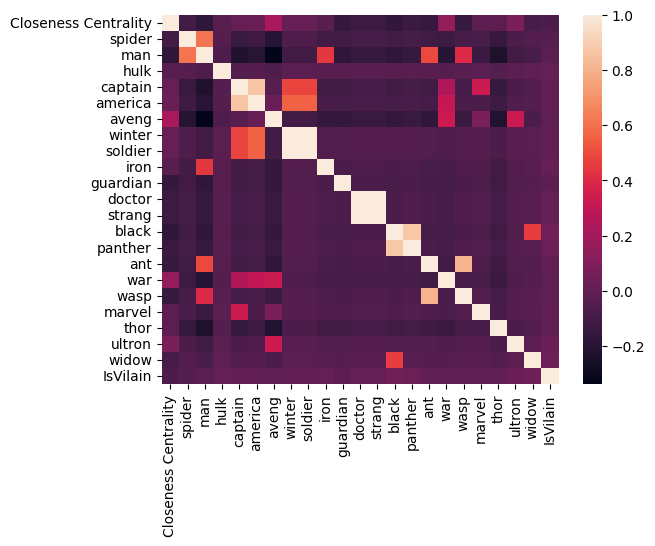

In [43]:
import seaborn as sns

sns.heatmap(df.corr())

### Analyse de la corrélation

La ligne qui nous intéresse est celle `IsVilain` où l'on peut remarquer qu'il n'y a pas de corrélation évidente avec les caractéristiques. On néanmoins remarquer que `Closeness Centrality` est la valeur la moins corrélé.

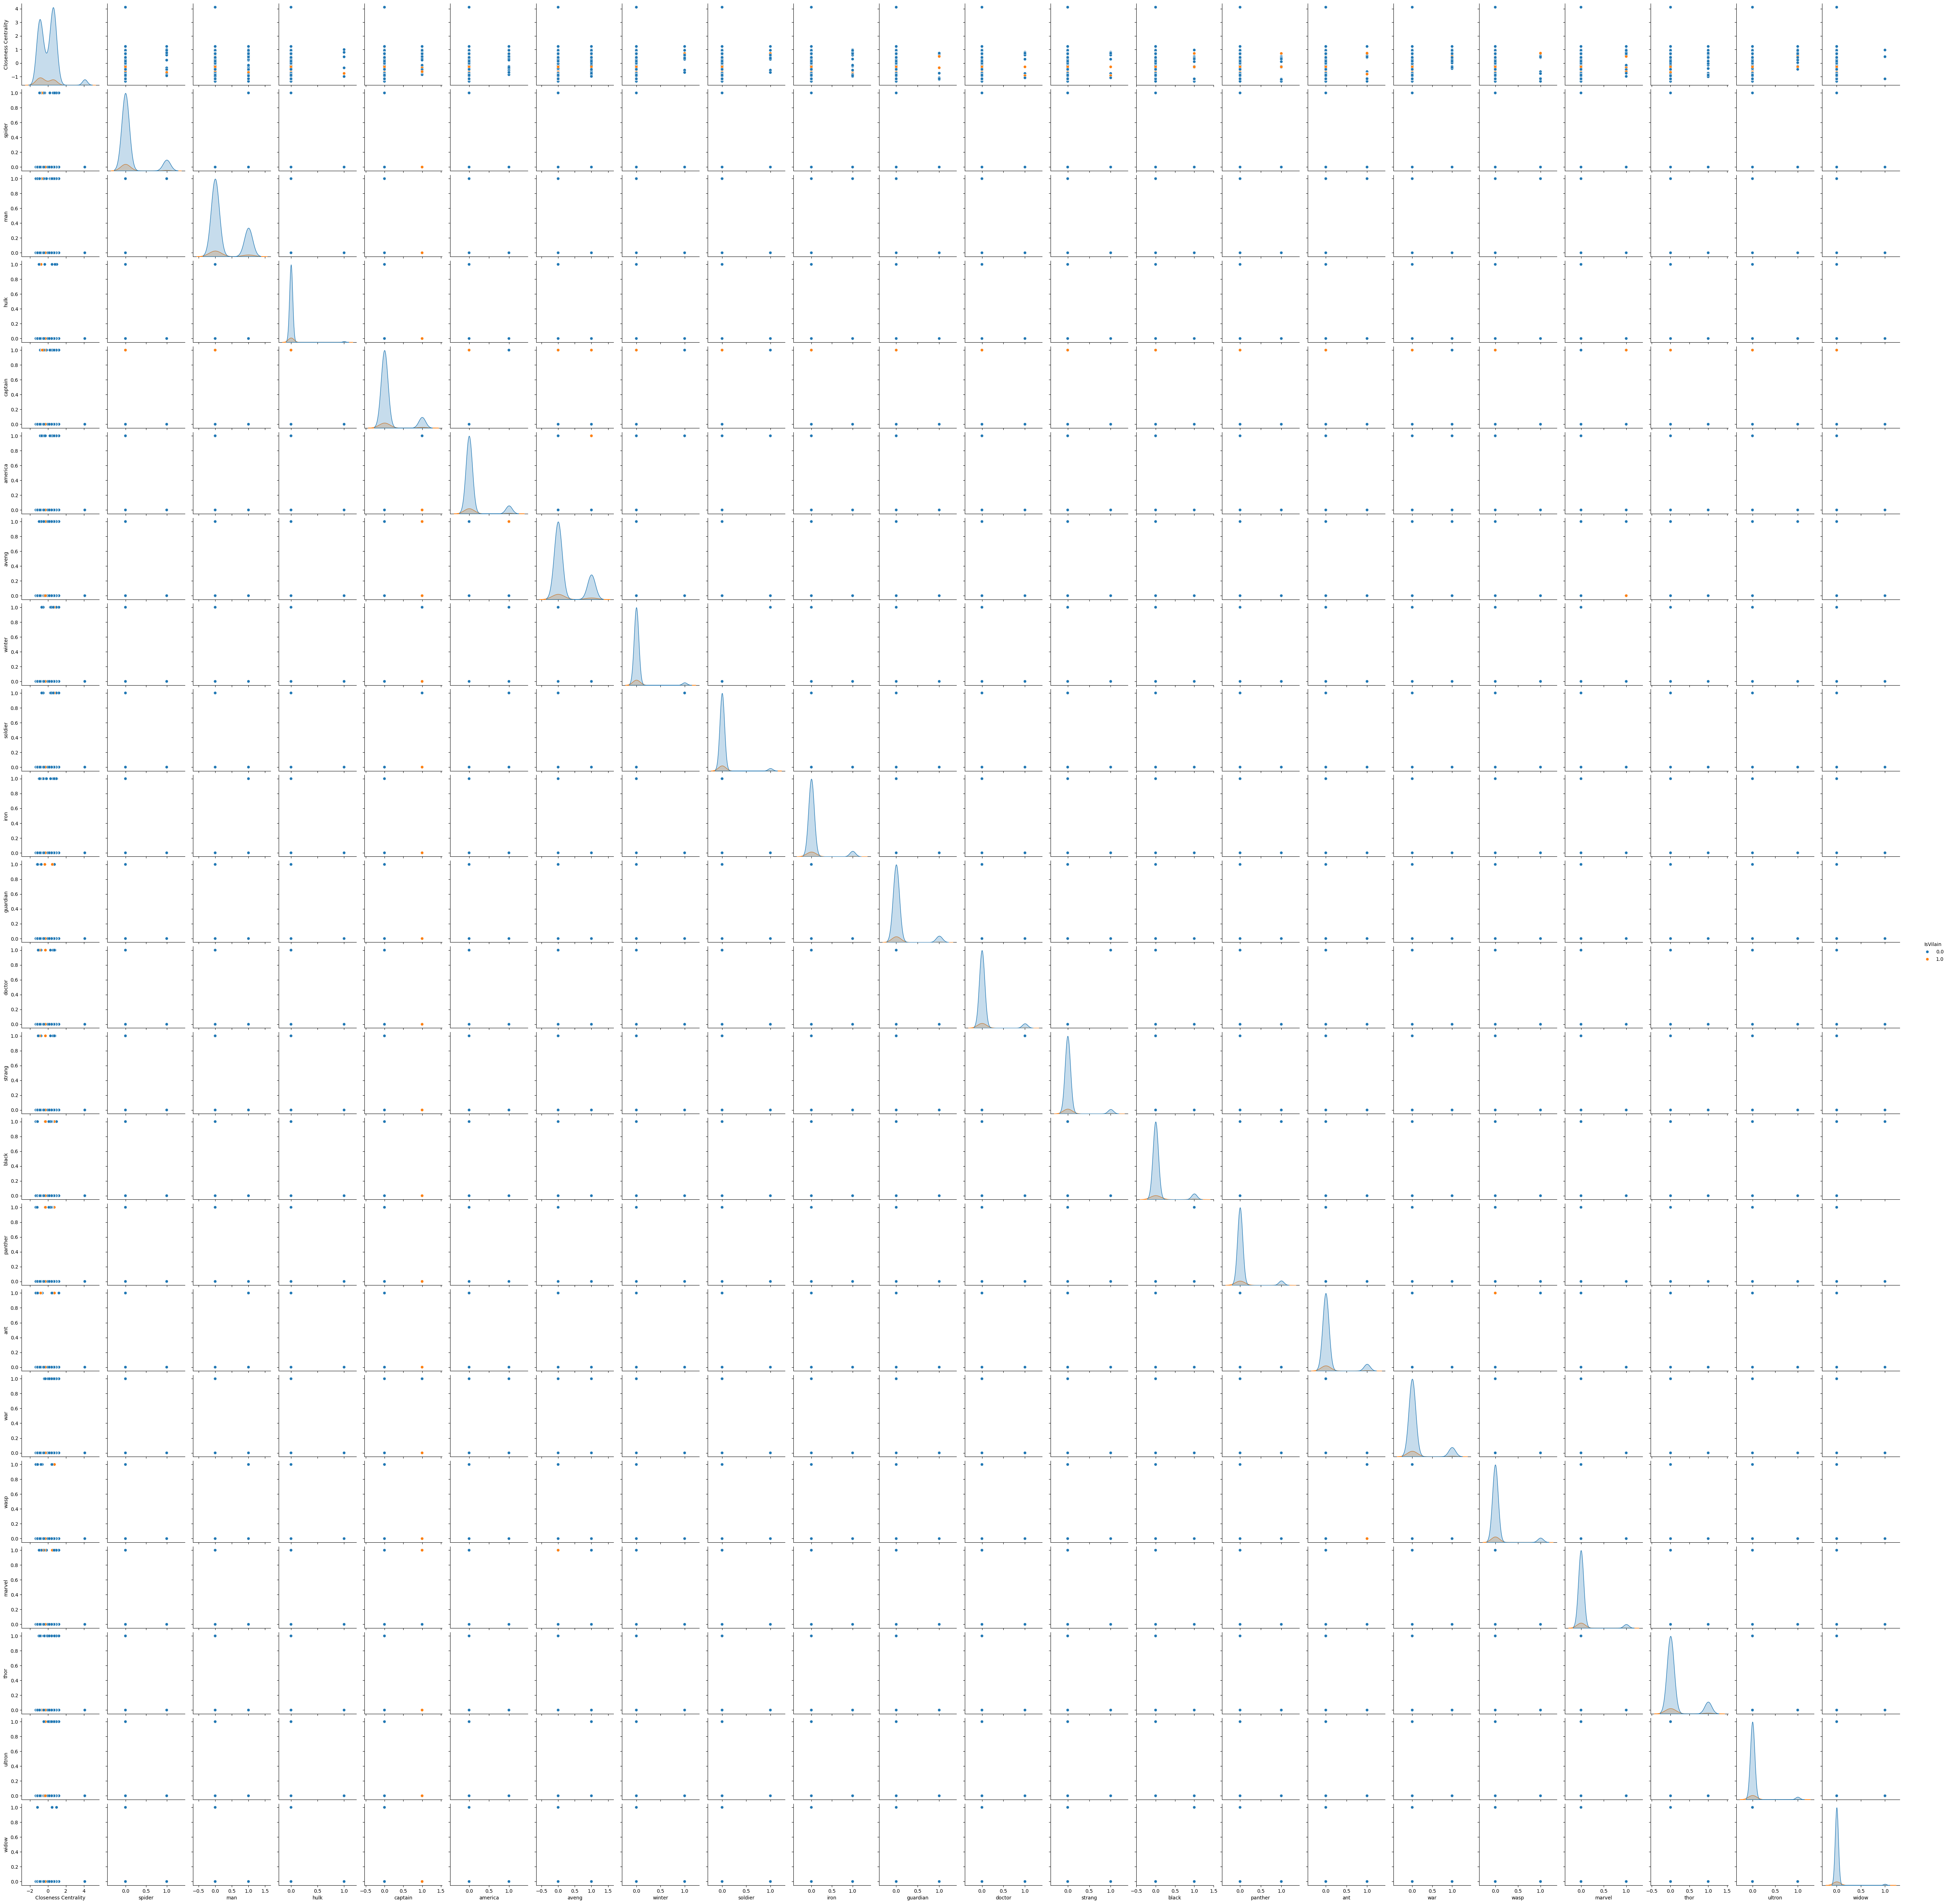

In [18]:
import seaborn as sns

sns.pairplot(df, hue="IsVilain")

## Analyse du pair plot

On peut y remarquer que la distribution des vilains est toujours dans l'ombre de la distribution des non-vilains. C'est-à-dire, on peut facilement distiguer un groupe de non vilain, puis parmis le restant à peu près le 1/5 sont des vilains confondu avec le 4/5 des non-vilains incertain. On peut aussi remarquer que le token `captain` est particulièrement discriminant.

Accuracy: 80.00 %


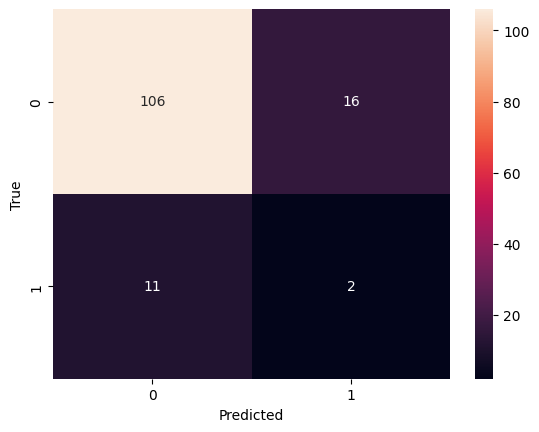

In [46]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(69420)
random_state=69420

X = df.drop(columns=["IsVilain"]).values
y = df["IsVilain"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train, y_train = BorderlineSMOTE(random_state=random_state).fit_resample(X_train, y_train)

classifier = ExplainableBoostingClassifier(
    random_state=random_state,
    feature_names=df.drop(columns=["IsVilain"]).columns,
    feature_types=["continuous" if col == "Closeness Centrality" else "nominal" for col in df.drop(columns=["IsVilain"]).columns]
)
classifier.fit(X_train, y_train)
y_pred = [float(y) for y in classifier.predict(X_test)]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(accuracy*100))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Analyse des résultats du modèle

On peut remarquer que la prédiction de non-vilain est particulièrement forte puisqu'il est facile à identifier cette classe. Toutefois seulement 2 vrai positif ont été identifié. Néanmoins, cela amène la performance du modèle à avoir une précision de 80 %.

In [31]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret import show

show(classifier.explain_global())

## Analyse de l'importance des caractéristique

On peut remarquer la caractéritisque la plus important est le token `tor` suivi de `aveng`, puis seulement en troisième position la caractéristique `Closeness Centrality` se retrouve. Il est donc, favorable de garder les caractéristiques des tokens liés aux films plutôt que de la mesure de centralité. Il en reste que toutefois, le modèle performe mieux avec l'ajour de cette mesure que sans. Si j'avais à garder un seul des sous-ensembles de caractéristiques je garderais celui des tokens des films puisqu'il est plus important selon le modèle.